In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
df["twp"].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [15]:
len(df['title'].unique())

110

In [16]:
df['title'].nunique()

110

In [17]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [19]:
df["Reasons"] = df['title'].apply(lambda title: title.split(':')[0])

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [24]:
df[df["Reasons"] == "Traffic"].head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic


In [25]:
df["Reasons"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

<AxesSubplot:xlabel='Reasons', ylabel='count'>

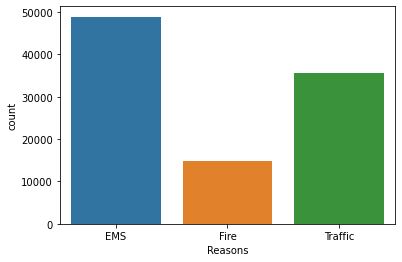

In [26]:
sns.countplot(x = "Reasons", data = df)

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [29]:
type(df['timeStamp'])

pandas.core.series.Series

In [30]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [32]:
df['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99492 entries, 0 to 99491
Series name: timeStamp
Non-Null Count  Dtype         
--------------  -----         
99492 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 777.4 KB


In [34]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [35]:
df['timeStamp'].iloc[0].hour

17

In [36]:
df["hour"] = df['timeStamp'].apply(lambda h: h.hour)

In [38]:
df["month"] = df['timeStamp'].apply(lambda m: m.month)

In [40]:
df["dayofweek"] = df['timeStamp'].apply(lambda d: d.dayofweek)

In [41]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [42]:
dmap = {1:'Monday', 2:'Tueday', 3:'Wednesday', 4:'Thurdsay', 5:'Friday', 6:'Saturday', 7:'Sunday'}

In [43]:
df["dayofweek"] = df['dayofweek'].map(dmap)

In [45]:
df.tail(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,hour,month,dayofweek
99482,40.340072,-75.591709,RT100 SB & E PHILADELPHIA AVE OVERPASS; DOUGLA...,NaN,Traffic: DISABLED VEHICLE -,2016-08-24 10:52:03,DOUGLASS,RT100 SB & E PHILADELPHIA AVE OVERPASS,1,Traffic,10,8,Tueday
99483,40.084465,-75.390173,DEKALB PIKE & KING OF PRUSSIA RD; UPPER MERIO...,19406.0,EMS: BACK PAINS/INJURY,2016-08-24 10:57:00,UPPER MERION,DEKALB PIKE & KING OF PRUSSIA RD,1,EMS,10,8,Tueday
99484,40.133037,-75.408463,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROVI...,19403.0,Fire: FIRE ALARM,2016-08-24 10:57:00,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,1,Fire,10,8,Tueday
99485,40.143601,-75.427877,EAGLEVILLE RD & REDTAIL RD; LOWER PROVIDENCE; ...,19403.0,Traffic: DISABLED VEHICLE -,2016-08-24 10:57:01,LOWER PROVIDENCE,EAGLEVILLE RD & REDTAIL RD,1,Traffic,10,8,Tueday
99486,40.179225,-75.180572,WELSH RD & NORRISTOWN RD; HORSHAM; 2016-08-24 ...,19044.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:02:02,HORSHAM,WELSH RD & NORRISTOWN RD,1,Traffic,11,8,Tueday
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Tueday
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Tueday
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Tueday
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Tueday
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic,11,8,Tueday


<AxesSubplot:xlabel='dayofweek', ylabel='count'>

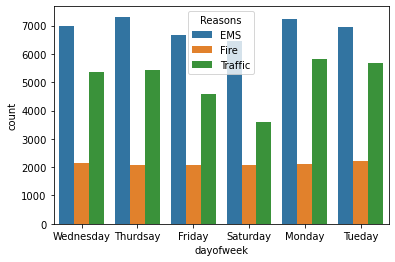

In [46]:
sns.countplot(x = 'dayofweek', hue = 'Reasons', data = df)

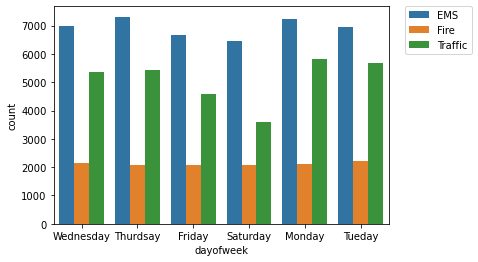

In [47]:
sns.countplot(x = 'dayofweek', hue = 'Reasons', data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

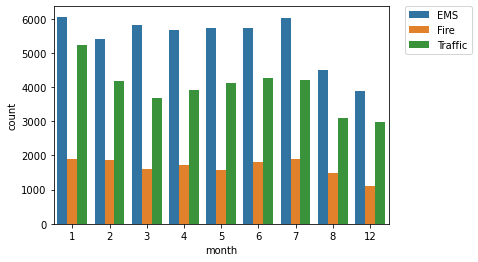

In [48]:
sns.countplot(x= 'month', hue = 'Reasons', data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [49]:
bymonth = df.groupby('month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,11478
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,9503
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,9566
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,9728
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,9644


<AxesSubplot:xlabel='month'>

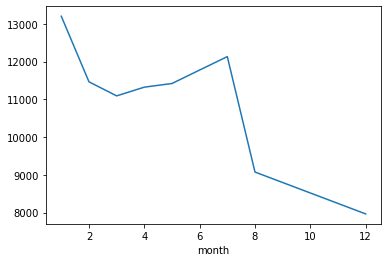

In [50]:
bymonth['twp'].plot()

In [51]:
bymonth.reset_index(inplace = True)

In [52]:
bymonth.head()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,hour,dayofweek
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,11478
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,9503
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,9566
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,9728
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,9644


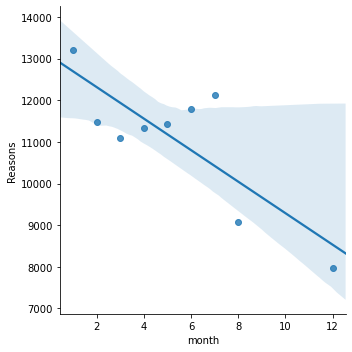

In [53]:
sns.lmplot(x = 'month', y = 'Reasons', data = bymonth)

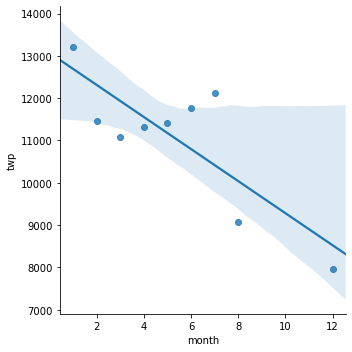

In [54]:
sns.lmplot(x = 'month', y = 'twp', data = bymonth)

In [55]:
df["date"] = df['timeStamp'].apply(lambda t: t.date())

In [56]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,hour,month,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Wednesday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Wednesday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Wednesday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Wednesday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Wednesday,2015-12-10


In [57]:
date_group = df.groupby('date').count()

In [59]:
date_group.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,hour,month,dayofweek
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,0


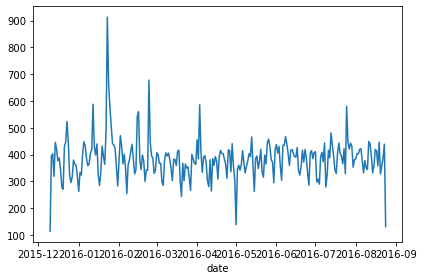

In [63]:
date_group['twp'].plot()
plt.tight_layout()